In [1]:
import uproot

dy_files = ["525CD279-3344-6043-98B9-2EA8A96623E4.root"]
gjets_files = ["8316E3E3-C9FD-914C-9AE2-DF47143B5BD5.root"]

file = uproot.open(dy_files[0])
dict(file)

{'tag;1': <TObjString 'untagged' at 0x7fa49751d5f0>,
 'Events;1': <TTree 'Events' (1628 branches) at 0x7fa4975391c0>,
 'LuminosityBlocks;1': <TTree 'LuminosityBlocks' (2 branches) at 0x7fa497529df0>,
 'Runs;1': <TTree 'Runs' (8 branches) at 0x7fa497539250>,
 'MetaData;1': <TTree 'MetaData' (1 branches) at 0x7fa497529c10>,
 'ParameterSets;1': <TTree 'ParameterSets' (1 branches) at 0x7fa4975390d0>}

In [2]:
tree = file['Events']
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
run                  | uint32_t                 | AsDtype('>u4')
luminosityBlock      | uint32_t                 | AsDtype('>u4')
event                | uint64_t                 | AsDtype('>u8')
HTXS_Higgs_pt        | float                    | AsDtype('>f4')
HTXS_Higgs_y         | float                    | AsDtype('>f4')
HTXS_stage1_1_cat... | int32_t                  | AsDtype('>i4')
HTXS_stage1_1_cat... | int32_t                  | AsDtype('>i4')
HTXS_stage1_1_fin... | int32_t                  | AsDtype('>i4')
HTXS_stage1_1_fin... | int32_t                  | AsDtype('>i4')
HTXS_stage1_2_cat... | int32_t                  | AsDtype('>i4')
HTXS_stage1_2_cat... | int32_t                  | AsDtype('>i4')
HTXS_stage1_2_fin... | int32_t                  | AsDtype('>i4')
HTXS_stage1_2_fin... | int32_t                  | AsDtype(

In [3]:
from coffea.nanoevents import NanoEventsFactory

dyevents = NanoEventsFactory.from_root(dy_files[0]).events()
gevents = NanoEventsFactory.from_root(gjets_files[0]).events()

In [4]:
dyevents.Electron.fields

['dEscaleDown',
 'dEscaleUp',
 'dEsigmaDown',
 'dEsigmaUp',
 'deltaEtaSC',
 'dr03EcalRecHitSumEt',
 'dr03HcalDepth1TowerSumEt',
 'dr03TkSumPt',
 'dr03TkSumPtHEEP',
 'dxy',
 'dxyErr',
 'dz',
 'dzErr',
 'eCorr',
 'eInvMinusPInv',
 'energyErr',
 'eta',
 'hoe',
 'ip3d',
 'jetPtRelv2',
 'jetRelIso',
 'mass',
 'miniPFRelIso_all',
 'miniPFRelIso_chg',
 'mvaFall17V2Iso',
 'mvaFall17V2noIso',
 'pfRelIso03_all',
 'pfRelIso03_chg',
 'phi',
 'pt',
 'r9',
 'scEtOverPt',
 'sieie',
 'sip3d',
 'mvaTTH',
 'charge',
 'cutBased',
 'jetIdx',
 'pdgId',
 'photonIdx',
 'tightCharge',
 'vidNestedWPBitmap',
 'vidNestedWPBitmapHEEP',
 'convVeto',
 'cutBased_HEEP',
 'isPFcand',
 'jetNDauCharged',
 'lostHits',
 'mvaFall17V2Iso_WP80',
 'mvaFall17V2Iso_WP90',
 'mvaFall17V2Iso_WPL',
 'mvaFall17V2noIso_WP80',
 'mvaFall17V2noIso_WP90',
 'mvaFall17V2noIso_WPL',
 'seedGain',
 'genPartIdx',
 'genPartFlav',
 'cleanmask',
 'genPartIdxG',
 'jetIdxG',
 'photonIdxG']

In [5]:
dyevents.Electron.cutBased.__doc__

'cut-based ID Fall17 V2 (0:fail, 1:veto, 2:loose, 3:medium, 4:tight)'

In [6]:
import awkward as ak
import numpy as np

a = ak.Array([[1, 2, 3], [4, -2, 4], [], [5]])
print(repr(a))
print(repr(ak.num(a)))

<Array [[1, 2, 3], [4, -2, 4], [], [5]] type='4 * var * int64'>
<Array [3, 3, 0, 1] type='4 * int64'>


In [7]:
print(a > 2)
print(abs(a))

[[False, False, True], [True, False, True], [], [True]]
[[1, 2, 3], [4, 2, 4], [], [5]]


In [8]:
object_cut = (a > 2)
print(object_cut)
print(a[object_cut])

[[False, False, True], [True, False, True], [], [True]]
[[3], [4, 4], [], [5]]


In [9]:
event_cut = ak.all(a > 2, axis=1)
print(event_cut)
print(a[event_cut])

[False, False, True, True]
[[], [5]]


In [10]:
print(a[event_cut])
print(ak.flatten(a[event_cut]))

[[], [5]]
[5]


In [11]:
b = ak.Array([1, 2, None, 4])
b

<Array [1, 2, None, 4] type='4 * ?int64'>

In [12]:
print(b)
print(ak.fill_none(b, -1))
print(b > 0)
print(ak.fill_none(b, -1) > 0)

[1, 2, None, 4]
[1, 2, -1, 4]
[True, True, None, True]
[True, True, False, True]


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import mplhep
mplhep.style.use(mplhep.style.CMS)

In [14]:
# run this again to make sure the figure size updates (a known bug)
mplhep.style.use(mplhep.style.CMS)

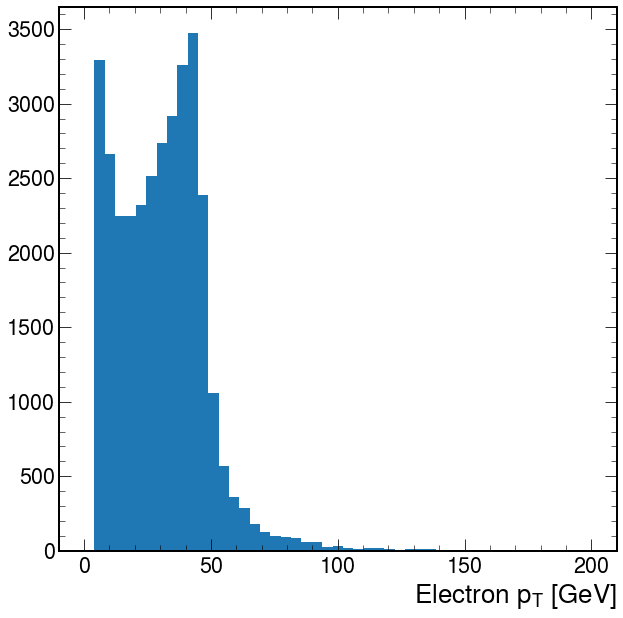

In [15]:
fig, ax = plt.subplots()
ax.set_xlabel(r'Electron $p_{T}$ [GeV]')
ax.hist(ak.flatten(dyevents.Electron.pt[abs(dyevents.Electron.eta) < 1.4]), bins=np.linspace(0, 200, 50));

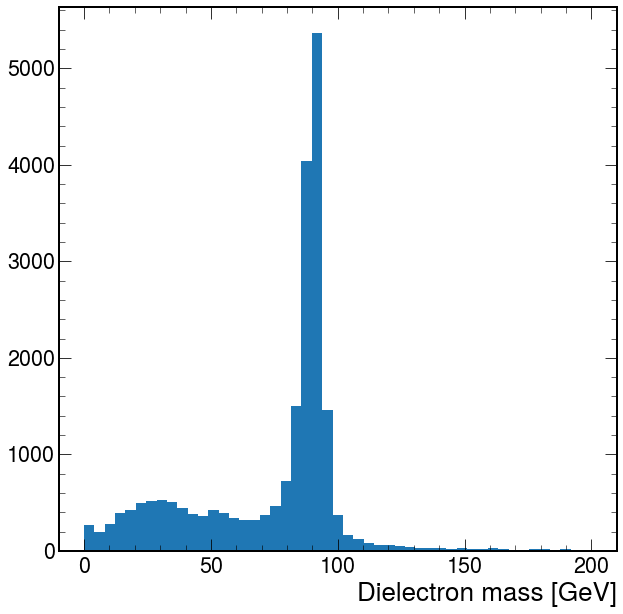

In [16]:
fig, ax = plt.subplots()
ax.set_xlabel(r'Dielectron mass [GeV]')

pairs = ak.combinations(dyevents.Electron, 2, fields=["lep1", "lep2"])
mass = (pairs.lep1 + pairs.lep2).mass
ax.hist(ak.flatten(mass), bins=np.linspace(0, 200, 50));

In [17]:
electrons = ak.flatten(dyevents.Electron)

true_electrons = electrons[ak.fill_none(abs(electrons.matched_gen.pdgId) == 11, False)]
photon_fakes = electrons[ak.fill_none(electrons.matched_gen.pdgId == 22, False)]
unmatched_electrons = electrons[ak.is_none(electrons.matched_gen)]

In [18]:
df = ak.to_pandas(
    ak.zip(
        {
            "parentId": abs(true_electrons.matched_gen.distinctParent.pdgId),
            "fromHardProcess": true_electrons.matched_gen.hasFlags(["fromHardProcess"]),
            "isPrompt": true_electrons.matched_gen.hasFlags(["isPrompt"]),
            "isDirectPromptTauDecayProduct": true_electrons.matched_gen.hasFlags(
                ["isDirectPromptTauDecayProduct"]
            ),
        }
    )
)

top10 = (
    df.groupby(list(df.columns))
    .size()
    .rename("count")
    .reset_index()
    .sort_values("count", ascending=False)
)[:10]

top10

,parentId,fromHardProcess,isPrompt,isDirectPromptTauDecayProduct,count
15,23.0,True,True,False,39213
11,15.0,False,False,True,5031
3,2.0,True,True,False,1130
1,1.0,True,True,False,329
6,4.0,True,True,False,258
13,21.0,True,True,False,196
4,3.0,True,True,False,122
16,111.0,False,False,False,58
22,511.0,False,False,False,50
23,521.0,False,False,False,47


In [19]:
promptmatch = true_electrons.matched_gen.hasFlags(['isPrompt'])
promptmatch = promptmatch | true_electrons.matched_gen.hasFlags(['isDirectPromptTauDecayProduct'])
prompt_electrons = true_electrons[promptmatch]
nonprompt_electrons = true_electrons[~promptmatch]

In [20]:
dyevents.Electron.genPartFlav.__doc__

'Flavour of genParticle (DressedLeptons for electrons) for MC matching to status==1 electrons or photons: 1 = prompt electron (including gamma*->mu mu), 15 = electron from prompt tau, 22 = prompt photon (likely conversion), 5 = electron from b, 4 = electron from c, 3 = electron from light or unknown, 0 = unmatched'

In [21]:
flavors, counts = np.unique(ak.to_numpy(prompt_electrons.genPartFlav), return_counts=True)
for flavor, count in zip(flavors, counts):
    print("GenPart flavor % 3d has % 8d occurrences" % (flavor, count))

GenPart flavor   1 has    41307 occurrences
GenPart flavor  15 has     5031 occurrences


In [22]:
photons = ak.flatten(gevents.Photon)
prompt_photons = photons[photons.genPartFlav == 1]
unmatched_photons = photons[photons.genPartFlav == 0]

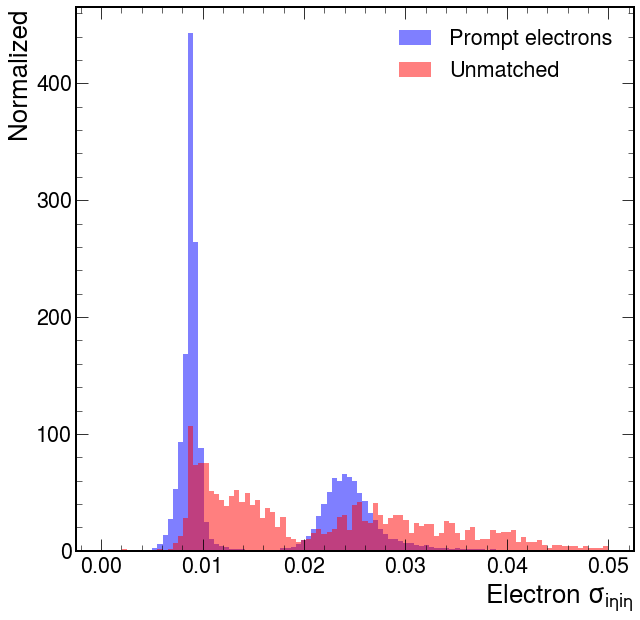

In [23]:
fig, ax = plt.subplots()
ax.set_xlabel(r'Electron $\sigma_{i \eta i \eta}$')
common_opts = {
    'alpha': 0.5,
    'bins': np.linspace(0, 0.05, 100),
    'density': True,
}

def cut(candidates):
    return candidates[
        (candidates.pt > 20.)
    ]

ax.hist(cut(prompt_electrons).sieie, color='blue', label='Prompt electrons', **common_opts)
#ax.hist(cut(photon_fakes).sieie, color='green', label='Photons', **common_opts)
#ax.hist(cut(nonprompt_electrons).sieie, color='orange', label='Non-prompt electrons', **common_opts)
ax.hist(cut(unmatched_electrons).sieie, color='red', label='Unmatched', **common_opts)

ax.legend()
ax.set_ylabel('Normalized' if common_opts['density'] else 'Events');

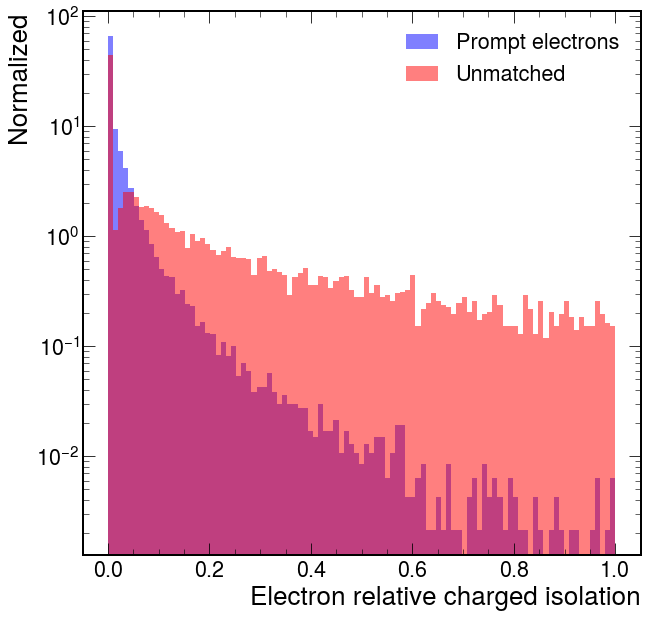

In [24]:
fig, ax = plt.subplots()
ax.set_xlabel(r'Electron relative charged isolation')
common_opts = {
    'alpha': 0.5,
    'bins': np.linspace(0, 1, 100),
    'density': True,
}

ax.hist(prompt_electrons.pfRelIso03_chg, color='blue', label='Prompt electrons', **common_opts)
# ax.hist(photon_fakes.pfRelIso03_chg, color='green', label='Photons', **common_opts)
# ax.hist(nonprompt_electrons.pfRelIso03_chg, color='orange', label='Non-prompt electrons', **common_opts)
ax.hist(unmatched_electrons.pfRelIso03_chg, color='red', label='Unmatched', **common_opts)

ax.legend()
ax.set_yscale('log')
ax.set_ylabel('Normalized' if common_opts['density'] else 'Events');

In [25]:
def makeroc(sig, bkg, binning, direction=1):
    '''Given a signal and background discriminant array, along with a binning,
    compute the ROC curve by integrating discriminant histograms along a direction:
        1: cut < value
        -1: cut >= value
    Returns a tuple of (signal efficiency, background efficiency)'''
    sighist, _ = np.histogram(ak.to_numpy(sig), bins=binning)
    bkghist, _ = np.histogram(ak.to_numpy(bkg), bins=binning)
    # numpy histogram will ignore values out of range of our binning (overflow)
    # so add the overflow values that would pass given our cut direction
    if direction == 1:
        sighist[0] += sum(sig < binning[0])
        bkghist[0] += sum(bkg < binning[0])
    elif direction == -1:
        sighist[-1] += sum(sig > binning[-1])
        bkghist[-1] += sum(bkg > binning[-1])
    else:
        raise ValueError("Invalid direction")
    sigpass = (np.cumsum(sighist[::direction]) / len(sig))[::direction]
    bkgpass = (np.cumsum(bkghist[::direction]) / len(bkg))[::direction]
    return (sigpass, bkgpass)


def cut(electrons):
    return electrons[
        (electrons.pt > 20)
        & (abs(electrons.eta) < 1.4)
    ]

roc_sieie = makeroc(
    sig=cut(prompt_electrons).sieie,
    bkg=cut(unmatched_electrons).sieie,
    binning=np.linspace(0.005, 0.02, 50),
    direction=1,
)

roc_hoe = makeroc(
    sig=cut(prompt_electrons).hoe,
    bkg=cut(unmatched_electrons).hoe,
    binning=np.linspace(0., 0.3, 50),
    direction=1,
)

roc_mva = makeroc(
    sig=cut(prompt_electrons).mvaFall17V2Iso,
    bkg=cut(unmatched_electrons).mvaFall17V2Iso,
    binning=np.linspace(-1, 1., 50),
    direction=-1,
)

In [26]:
sig_pass = cut(prompt_electrons).cutBased >= prompt_electrons.LOOSE
bkg_pass = cut(unmatched_electrons).cutBased >= prompt_electrons.LOOSE
wp_cutbased_loose = (
    sum(sig_pass) / len(sig_pass),
    sum(bkg_pass) / len(bkg_pass),
)

sig_pass = cut(prompt_electrons).cutBased >= prompt_electrons.TIGHT
bkg_pass = cut(unmatched_electrons).cutBased >= prompt_electrons.TIGHT
wp_cutbased_tight = (
    sum(sig_pass) / len(sig_pass),
    sum(bkg_pass) / len(bkg_pass),
)

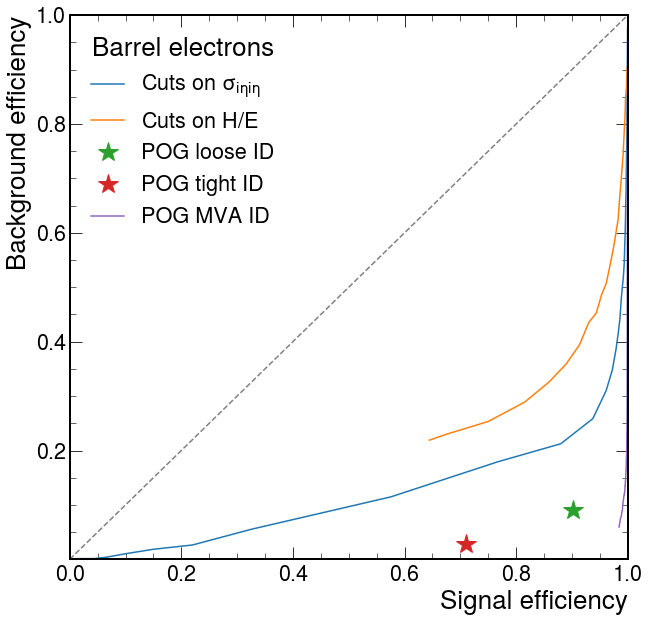

In [27]:
fig, ax = plt.subplots()
ax.plot(*roc_sieie, label=r"Cuts on $\sigma_{i\eta i\eta}$")
ax.plot(*roc_hoe, label=r"Cuts on $H/E$")
ax.plot(*wp_cutbased_loose, label=r"POG loose ID", marker='*', markersize=20, linestyle='none')
ax.plot(*wp_cutbased_tight, label=r"POG tight ID", marker='*', markersize=20, linestyle='none')
ax.plot(*roc_mva, label=r"POG MVA ID")

diag = np.linspace(0, 1, 100)
ax.plot(diag, diag, color='grey', linestyle='--')
ax.set_xlabel("Signal efficiency")
ax.set_ylabel("Background efficiency")
ax.set_xlim(0, 1)
ax.set_ylim(1e-3, 1)
# ax.set_yscale('log')
ax.legend(title=r'Barrel electrons')

In [28]:
import hist

efficiency = hist.Hist(
    hist.axis.StrCategory(["pass", "fail"], name="region", label="Region"),
    hist.axis.Regular(18, 20, 200, name="pt", label=r"$p_{T}$"),
    hist.axis.Regular(25, -2.5, 2.5, name="eta", label=r"$\eta$")
)

passing = prompt_electrons.cutBased >= prompt_electrons.TIGHT
efficiency.fill(region="pass", pt=prompt_electrons[passing].pt, eta=prompt_electrons[passing].eta)
efficiency.fill(region="fail", pt=prompt_electrons[~passing].pt, eta=prompt_electrons[~passing].eta)

efficiency

Hist(
  StrCategory(['pass', 'fail'], name='region', label='Region'),
  Regular(18, 20, 200, name='pt', label='$p_{T}$'),
  Regular(25, -2.5, 2.5, name='eta', label='$\\eta$'),
  storage=Double()) # Sum: 36483.0 (46338.0 with flow)

Text(0, 1, '$\\epsilon$')

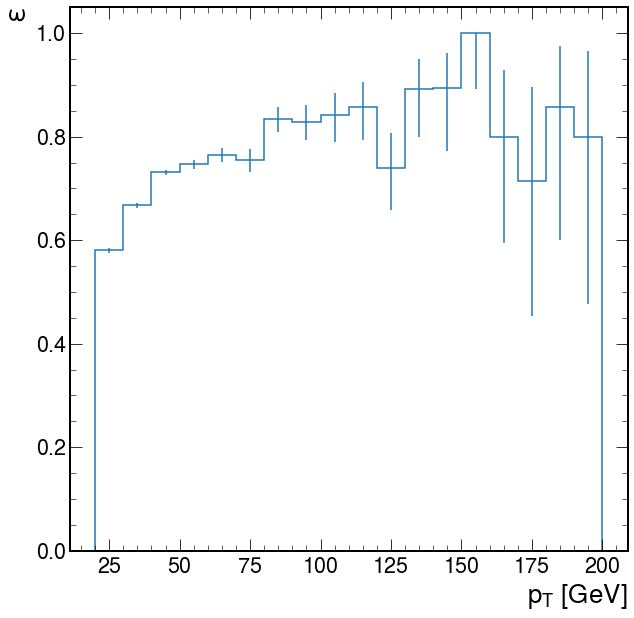

In [29]:
from hist.intervals import clopper_pearson_interval

num = efficiency["pass", ...].project("pt").view()
denom = efficiency.project("pt").view()
edges = efficiency.axes["pt"].edges
err = abs(clopper_pearson_interval(num, denom) - num / denom)

fig, ax = plt.subplots()
mplhep.histplot(num / denom, bins=edges, yerr=err, ax=ax)
ax.set_xlabel("$p_{T}$ [GeV]")
ax.set_ylabel("$\epsilon$")

Text(0, 1, '$\\epsilon$')

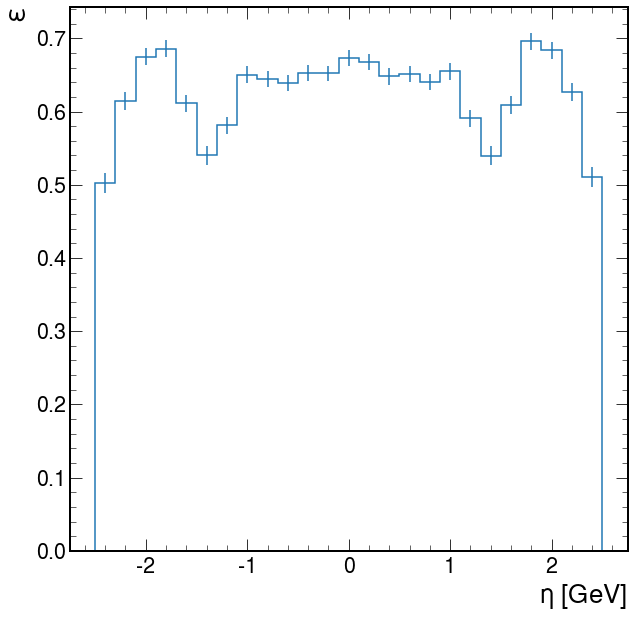

In [30]:
from hist.intervals import clopper_pearson_interval

num = efficiency["pass", ...].project("eta").view()
denom = efficiency.project("eta").view()
edges = efficiency.axes["eta"].edges
err = abs(clopper_pearson_interval(num, denom) - num / denom)

fig, ax = plt.subplots()
mplhep.histplot(num / denom, bins=edges, yerr=err, ax=ax)
ax.set_xlabel("$\eta$ [GeV]")
ax.set_ylabel("$\epsilon$")

symmetry in eta

In [41]:
zcands = ak.combinations(dyevents.Electron, 2, fields=["tag", "probe"])
# filter pairs to have a good tag
zcands = zcands[
    (zcands.tag.pt >= 20)
    & (abs(zcands.tag.eta) < 2.1)
    & (zcands.tag.cutBased >= zcands.tag.TIGHT)
    & (zcands.probe.pt >= 20)
]
# filter out events that have no z candidates
zcands = zcands[ak.num(zcands) > 0]
# some events may have multiple candidates, take the leading one (as they are sorted by pt)
zcands = ak.firsts(zcands)
# compute invariant mass
mass = (zcands.tag + zcands.probe).mass

goodprobe = zcands.probe.cutBased >= zcands.probe.LOOSE

Text(1, 0, 'Dielectron mass [GeV]')

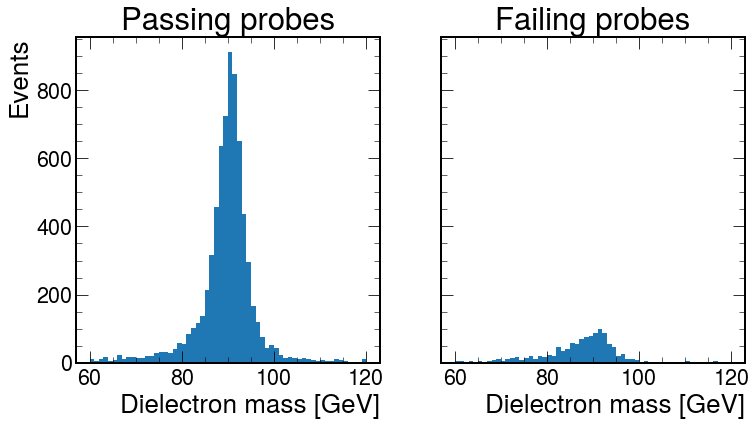

In [42]:
fig, (axp, axf) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
mbins = np.linspace(60, 120, 61)

axp.hist(mass[goodprobe], bins=mbins)
axp.set_title('Passing probes')
axp.set_ylabel('Events')
axp.set_xlabel('Dielectron mass [GeV]')

axf.hist(mass[~goodprobe], bins=mbins)
axf.set_title('Failing probes')
axf.set_xlabel('Dielectron mass [GeV]')

In [43]:
from correctionlib import CorrectionSet

evaluator = CorrectionSet.from_file("/cvmfs/cms.cern.ch/rsync/cms-nanoAOD/jsonpog-integration/POG/EGM/2018_UL/electron.json.gz")

Text(1, 0, 'Dielectron mass [GeV]')

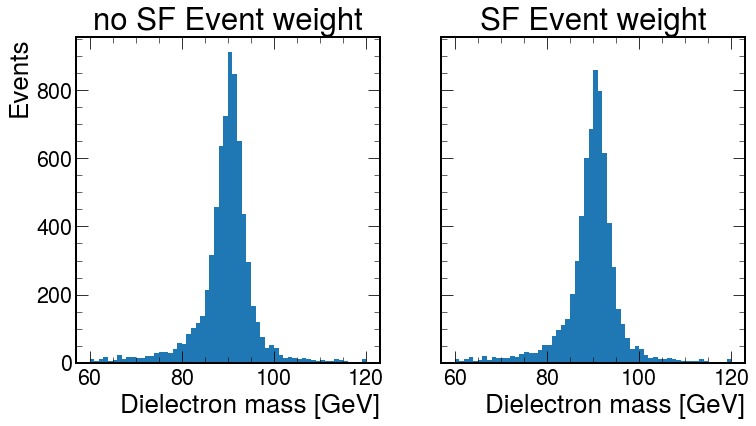

In [44]:
#Get the ID scale factor for each electron in the pair
sfel1 = evaluator["UL-Electron-ID-SF"].evaluate("2018","sf","Tight",zcands.tag.eta,zcands.tag.pt)
sfel2 = evaluator["UL-Electron-ID-SF"].evaluate("2018","sf","Loose",zcands.probe.eta,zcands.probe.pt)

sftot = sfel1*sfel2

#Apply the weights to the 'Good probes' Z mass peak
fig, (axunw, axw) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
mbins = np.linspace(60, 120, 61)

axunw.hist(mass[goodprobe], bins=mbins)
axunw.set_title('no SF Event weight')
axunw.set_ylabel('Events')
axunw.set_xlabel('Dielectron mass [GeV]')

axw.hist(mass[goodprobe], bins=mbins, weights=sftot[goodprobe])
axw.set_title('SF Event weight')
axw.set_xlabel('Dielectron mass [GeV]')

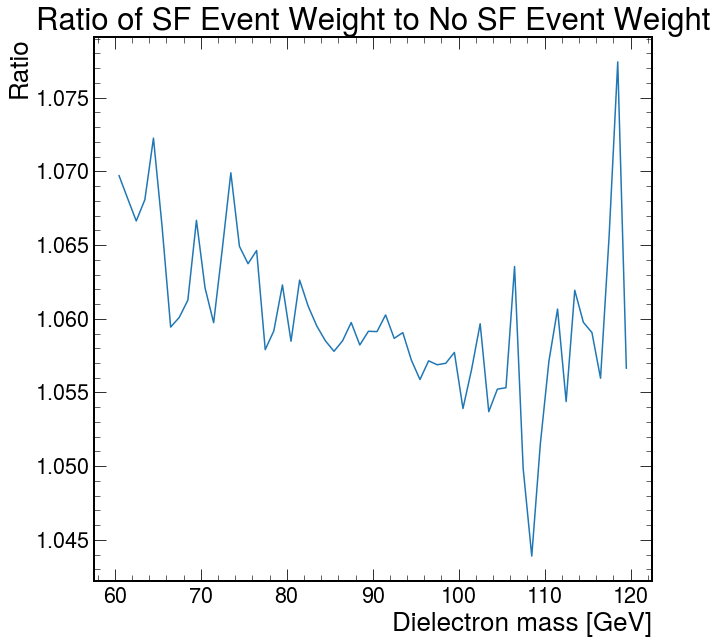

In [60]:
bin_content_unweighted, bin_edges_unweighted = np.histogram(mass[goodprobe], bins=mbins)
bin_content_weighted, bin_edges_weighted = np.histogram(mass[goodprobe], bins=mbins, weights=sftot[goodprobe])

bin_centers = (bin_edges_unweighted[:-1] + bin_edges_unweighted[1:]) / 2

ratio = bin_content_unweighted / bin_content_weighted

fig, ax = plt.subplots()

ax.plot(bin_centers, ratio)

ax.set_title('Ratio of SF Event Weight to No SF Event Weight')
ax.set_xlabel('Dielectron mass [GeV]')
ax.set_ylabel('Ratio')

plt.show()